<a href="https://colab.research.google.com/github/Chaitra-B-V/Frequent-Pattern-Mining-Algorithms/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=cf43db6882c9909fcf8379343ef086ce87ccb3f46d05ca7e5339dd5bee4245d6
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [ ]:
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Chaitra-B-V/Frequent-Pattern-Mining-Algorithms/04d1e68966e5314e5404acb42f3f81f848ff1fe0/Groceries_dataset.csv")

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info() # Checking data type information for validation purpose

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


no null value should be present

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) ## Type-Conversion from Object to Dateime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


Exploratory Data Analysis

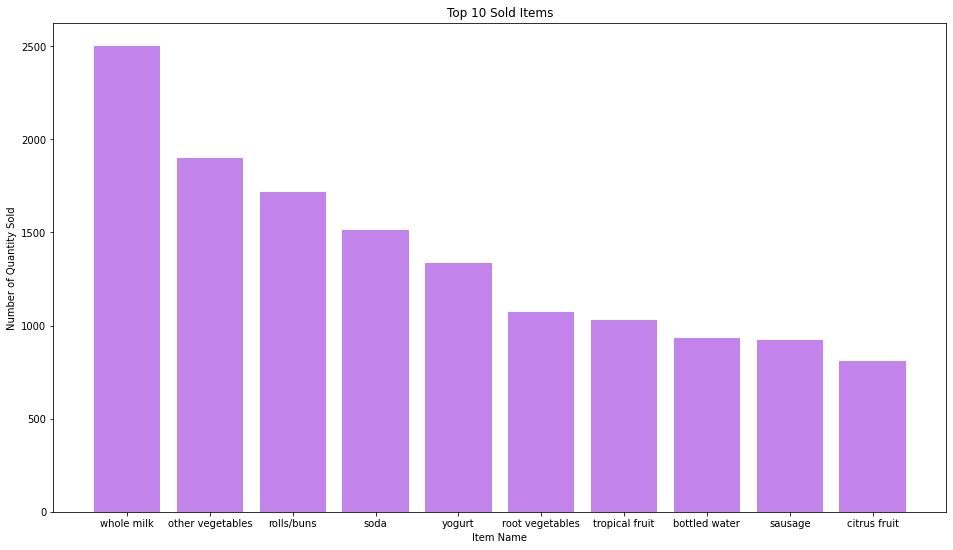

In [ ]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "itemDescription").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(10)

## Declaring variables

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.7, 0.4, 0.9, 0.8))

# Add title and axis names
plt.title("Top 10 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

In [ ]:
df_date=df.set_index(['Date']) ## Setting date as index for plotting purpose
df_date

,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-05-01,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-01-02,3037,whole milk
...,...,...
2014-08-10,4471,sliced cheese
2014-02-23,2022,candy
2014-04-16,1097,cake bar


[Text(0, 0.5, 'Number of Items Sold'), Text(0.5, 0, 'Date')]

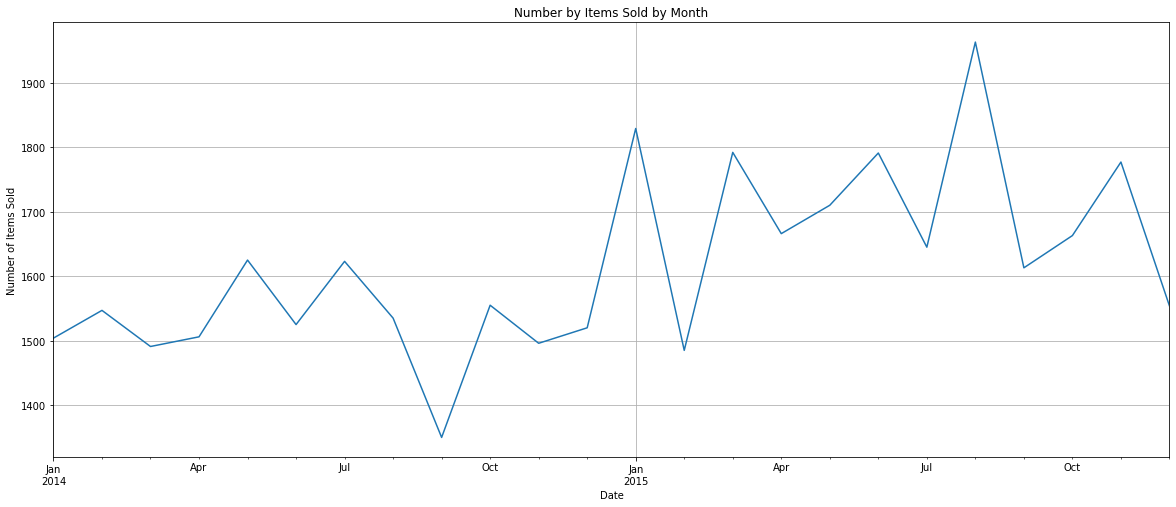

In [ ]:
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

Data Preparation

In [ ]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] 
## Combing all the items in list format for each cutomer

Training the model

In [ ]:
from apyori import apriori 
## Importing apriori package
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2)
## Model Creation

In [ ]:
results = list(rules) 
## Storing results in list format for better visualisation

In [ ]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
## Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
resultsinDataFrame.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,rice,napkins,0.003079,0.244898,3.011395
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239
